In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# BY PRODUCT

In [2]:
by_product = pd.read_excel('by_product.xlsx')

In [3]:
by_product.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


Product Type,

Net Quantity, Product weight? (Excluding the package ?)

Gross Sales, metric for the total sales of a company, unadjusted for the costs related to generating those sales. 

Discounts, 

Returns, Product returned by customer

Total Net Sales are calculated by deducting sales allowances, sales discounts, and sales returns from gross sales.

Source: https://www.investopedia.com/terms/g/grosssales.asp

In [4]:
by_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


<AxesSubplot:>

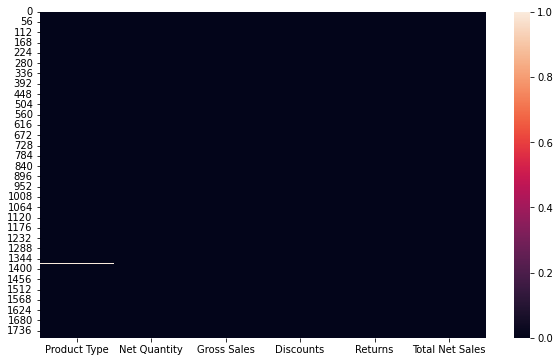

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(by_product.isnull())

In [6]:
by_product['Product Type'].isnull().sum()

8

In [7]:
by_product = by_product.dropna()

<AxesSubplot:>

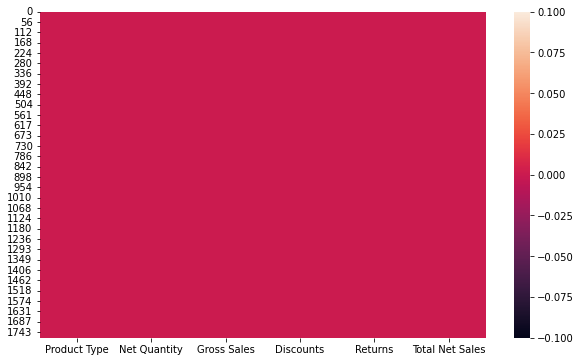

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(by_product.isnull())

**Convert to absolute value, cz we know that discounts and returns reduce gross sales value**

In [9]:
by_product[['Discounts', 'Returns']] = by_product[['Discounts', 'Returns']].abs()

In [10]:
by_product[by_product['Total Net Sales']<0]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1774,Kitchen,-1,0.0,0.0,106.25,-106.25


# BY MONTH

In [11]:
by_month = pd.read_excel('by_month.xlsx')

In [12]:
by_month.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


<AxesSubplot:>

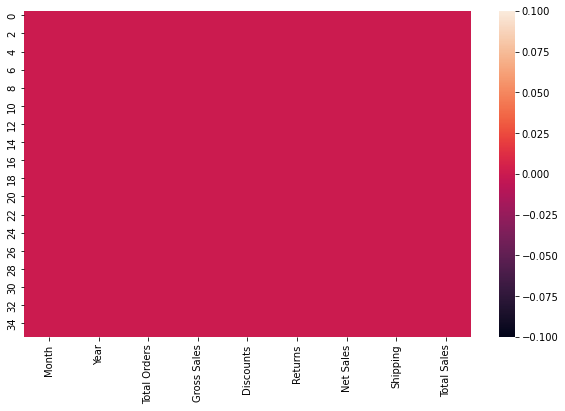

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(by_month.isnull())

**Absolute value of some columns**

In [14]:
by_month[['Discounts', 'Returns']] = by_month[['Discounts', 'Returns']].abs()

# Exploratory Data Analysis

In [15]:
by_product.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,594.00,1609.0,12732.00
1,Basket,13,3744.0,316.80,0.0,3427.20
2,Basket,12,3825.0,201.60,288.0,3335.40
3,Basket,17,3035.0,63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,44.16,0.0,2652.64


In [16]:
by_month.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,129.40,448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,104.70,416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,172.20,1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,185.75,253.80,6237.45,866.46,7103.91


Text(0.5, 1.0, 'Product Type by Net Quantity')

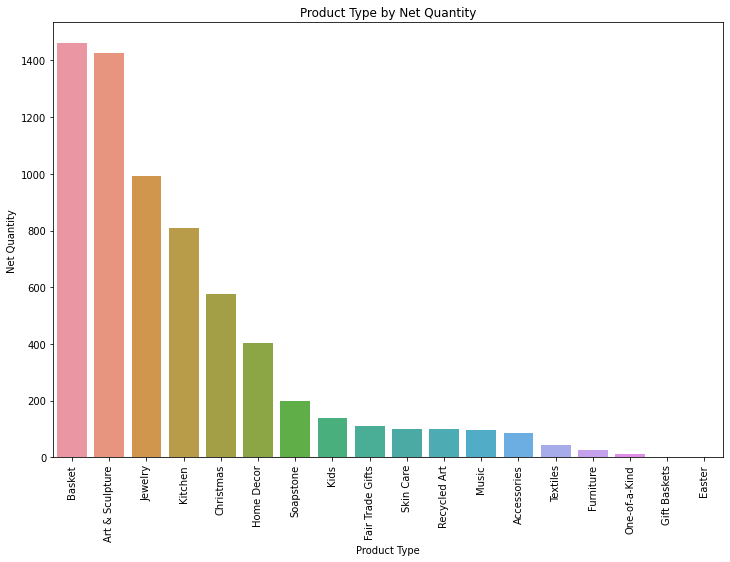

In [19]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
Net=by_product[['Product Type', 'Net Quantity']].groupby(['Product Type'], as_index=False).sum().sort_values(
    by='Net Quantity', ascending=False)
sns.barplot(x='Product Type', y='Net Quantity', data=Net).set_title('Product Type by Net Quantity')

Text(0.5, 1.0, 'Product Type by Net Sales')

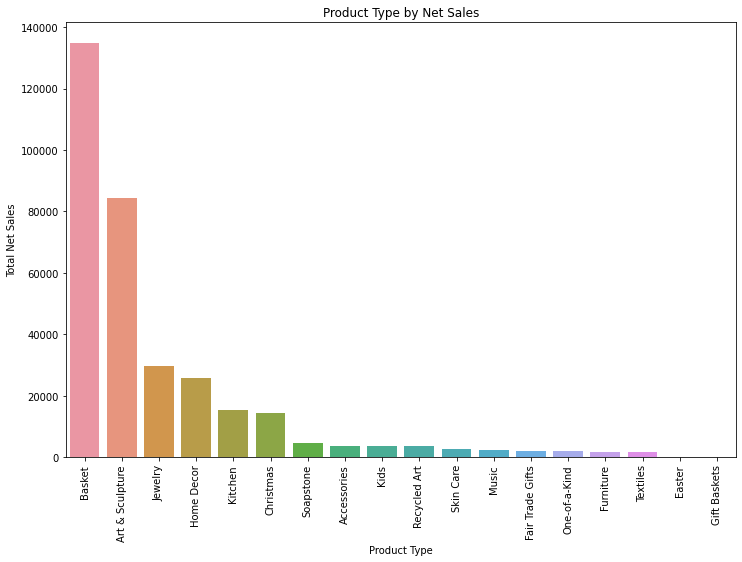

In [20]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
Total=by_product[['Product Type', 'Total Net Sales']].groupby(['Product Type'], as_index=False).sum().sort_values(
    by='Total Net Sales', ascending=False)
sns.barplot(x='Product Type', y='Total Net Sales', data=Total).set_title('Product Type by Net Sales')

In [38]:
by_product[by_product['Product Type']=='Gift Baskets']

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1690,Gift Baskets,1,19.5,0.0,0.0,19.5


In [42]:
by_product[by_product['Product Type']=='Easter']

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1482,Easter,1,38.0,3.8,0.0,34.2


Text(0.5, 1.0, 'Product Type by Discounts')

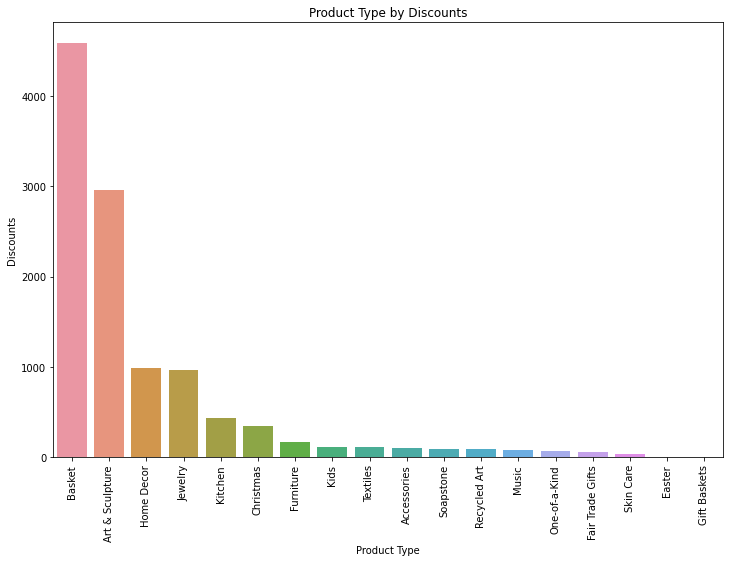

In [61]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
Dis=by_product[['Product Type', 'Discounts']].groupby(['Product Type'], as_index=False).sum().sort_values(
    by='Discounts', ascending=False)
sns.barplot(x='Product Type', y='Discounts', data=Dis).set_title('Product Type by Discounts')

In [64]:
sum_df = pd.concat([Net,Total,Dis], axis=1)
sum_df = sum_df.loc[:,~sum_df.columns.duplicated()].sort_values(by='Total Net Sales', ascending=False)
sum_df

,Product Type,Net Quantity,Total Net Sales,Discounts
2,Basket,1461,134791.39,4584.42
1,Art & Sculpture,1427,84480.85,2955.82
9,Jewelry,991,29572.95,965.85
8,Home Decor,404,25699.99,991.21
11,Kitchen,809,15336.82,431.11
3,Christmas,575,14460.81,345.19
16,Soapstone,199,4629.09,96.91
0,Accessories,84,3785.38,107.02
10,Kids,140,3721.34,116.66
14,Recycled Art,99,3704.16,88.64


In [68]:
sum_df.corr()

,Net Quantity,Total Net Sales,Discounts
Net Quantity,1.000000,0.888957,0.878048
Total Net Sales,0.888957,1.000000,0.998571
Discounts,0.878048,0.998571,1.000000


Basket, Art & Sculpture and Jewelry are the most profitable product type. They gain the most Total Net Sales. Gift Baskets and Easter are the least profitable product type. Both of them have Total Net Sales less than 40.00

Products with high discount value tend to have high net sales value, Basket, Art & Sculpture, Home Decore and Jewelry are top 4 product with the highest Net Sales and Discounts. The sales can be increased by giving discounts on the products with the lowest net sales value

In [86]:
by_month.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,129.40,448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,104.70,416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,172.20,1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,185.75,253.80,6237.45,866.46,7103.91


<AxesSubplot:xlabel='Month', ylabel='Total Sales'>

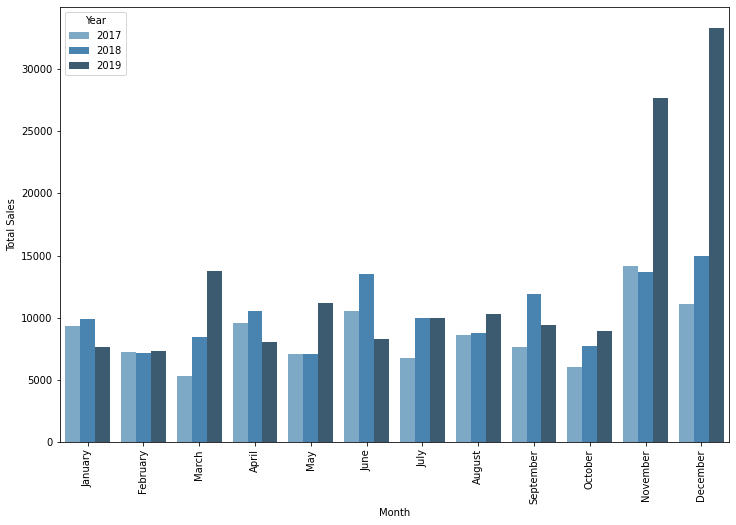

In [83]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data=by_month, x='Month', y='Total Sales', hue='Year', palette='Blues_d')

<AxesSubplot:xlabel='Month', ylabel='Discounts'>

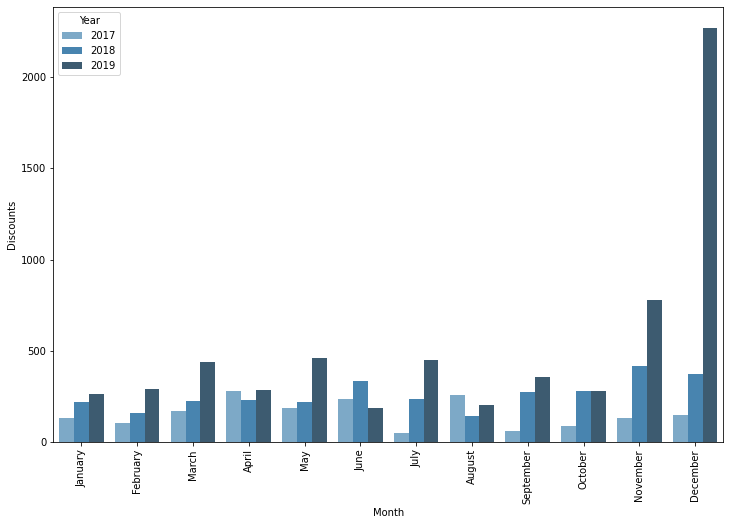

In [85]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data=by_month, x='Month', y='Discounts', hue='Year', palette='Blues_d')

The highest average total sales value is in November and December, cz in that month the discount value is also high